In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/gapminder.tsv', sep='\t')

In [5]:
# get head of file or first 5 elements
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [7]:
# get df type
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#get shape of df (no. rows, no. columns)
print(df.shape)

(1704, 6)


In [10]:
# get column names
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [11]:
# get types for each column
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [12]:
# information about df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


In [20]:
# get country column
df['country'].head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [26]:
# get country column
df.country.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [29]:
# get multiple columns by supplying a list of columns as the index
subset = df[['country', 'continent', 'year']]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [49]:
# get columns by using integer index
subset = df.iloc[:,[1,3, -2, -1]]
subset.head()

,continent,lifeExp,pop,gdpPercap
0,Asia,28.801,8425333,779.445314
1,Asia,30.332,9240934,820.853030
2,Asia,31.997,10267083,853.100710
3,Asia,34.020,11537966,836.197138
4,Asia,36.088,13079460,739.981106


In [41]:

df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [52]:
list(range(3,6))

[3, 4, 5]

In [56]:
df.iloc[:,list(range(3,6))].head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [63]:
#get the first row of df
first_row =df.loc[0]
first_row

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [64]:
# get the 100th row of df
hundredth_row = df.loc[99]
hundredth_row

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [65]:
# get last row
last_row = df.loc[df.shape[0]-1]
last_row

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [68]:
# notice the type is different 
print(type(first_row))
print(type(df.head(1)))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [70]:
# ix will first use loc, and if not found, then use iloc
#df.ix[0]
# .ix is deprecated. Please use
# .loc for label based indexing or
# .iloc for positional indexing

# http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix

In [73]:
# get 43rd row, 1st column
df.iloc[42, 0]

'Angola'

In [76]:
# get rows 42, 145, columns 0,1,5
df.iloc[[42, 145], [0,1,5]]

,country,continent,gdpPercap
42,Angola,Africa,2756.953672
145,Bosnia and Herzegovina,Europe,1353.989176


In [80]:
# get mean of lifeExp by year
# sql: select avg(lifeExp) from [data] group by year
grouped_year_df = df.groupby('year')['lifeExp'].mean()
grouped_year_df

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [81]:
type(grouped_year_df)

pandas.core.series.Series

In [87]:
grouped_year_df = df.groupby('year')
print(grouped_year_df)

In [89]:
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
grouped_year_df_lifeExp

In [90]:
grouped_year_df_lifeExp.mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [91]:
# get mean of lifeExp by year
# sql: select avg(lifeExp), avg(gdpPercap) from [data] group by year, continent
grouped_year_df = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
grouped_year_df

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [92]:
# number of unique countries by continent in df
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [93]:
import matplotlib.pyplot as plt

In [94]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()

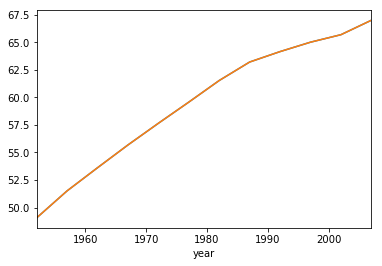

In [96]:
global_yearly_life_expectancy.plot()
plt.show()

In [97]:
# pandas data structures

In [99]:
s = pd.Series(['banan', 42])
s

0    banan
1       42
dtype: object

In [101]:
# create two series and override default indices/labels
s = pd.Series(['Wes McKinney', 'Creator of Pandas'], index = ['Person', 'Who'])
s

Person         Wes McKinney
Who       Creator of Pandas
dtype: object

In [103]:
# create a new dataframe with two series
# notice column names are not in the order as defined
scientists = pd.DataFrame(
    {'Name': ['Rosaline Franklin', 'William Gosset'], 
     'Occupation': ['Chemist', 'Statistician'], 
     'Born': ['1920', '1876'], 
     'Age': [20, 25]})
scientists

,Age,Born,Name,Occupation
0,20,1920,Rosaline Franklin,Chemist
1,25,1876,William Gosset,Statistician


In [105]:
# now use name as index and use columns to specify column names
scientists = pd.DataFrame(
    {'Occupation': ['Chemist', 'Statistician'], 
     'Born': ['1920', '1876'], 
     'Age': [20, 25]}, index= ['Rosaline Franklin', 'William Gosset'], columns=['Occupation', 'Born', 'Age'])
scientists

,Occupation,Born,Age
Rosaline Franklin,Chemist,1920,20
William Gosset,Statistician,1876,25


In [112]:
first_row = scientists.loc['William Gosset']
print(type(first_row))
print(first_row.index)
print(first_row.values)
print(first_row.keys())
print(first_row.values[0])
print(first_row.keys()[0])
first_row

<class 'pandas.core.series.Series'>
Index(['Occupation', 'Born', 'Age'], dtype='object')
['Statistician' '1876' 25]
Index(['Occupation', 'Born', 'Age'], dtype='object')
Statistician
Occupation


Occupation    Statistician
Born                  1876
Age                     25
Name: William Gosset, dtype: object

In [118]:
scientists = pd.read_csv('../Data/scientists.csv')
ages = scientists['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [119]:
ages.mean()

59.125

In [120]:
ages.min()

37

In [121]:
ages.max()

90

In [122]:
ages.std()

18.325918413937288

In [123]:
ages.describe()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [124]:
# ONLY those that have age greater than the mean
ages[ages>ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [128]:
# manually set boolean values to mask return values
bool_values = [True, True, False, False, True, True, False, True]
ages[bool_values]

0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64

In [131]:
# operations when items have equal number of items
print(ages+ ages)
print(ages + 100)
print(ages * 3)
print(ages + pd.Series([1,2]))

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64
0    111
1    183
2    270
3    198
4    168
5    135
6    123
7    231
Name: Age, dtype: int64
0    38.0
1    63.0
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
dtype: float64


In [132]:
scientists[scientists['Age']> scientists['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [134]:
bool_values = [True, True, False, False, True, True, False, True]
scientists[bool_values]

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [135]:
scientists * 2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [145]:
# convert string to datetime
born_dt = pd.to_datetime(scientists.Born, format='%Y-%m-%d')
died_dt = pd.to_datetime(scientists.Died, format='%Y-%m-%d')
print(born_dt.dtype)
born_dt

datetime64[ns]


0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [146]:
# assign a new column to df
scientists_original = scientists.copy()
scientists['born_dt'] = born_dt
scientists['died_dt'] = died_dt
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23


In [147]:
scientists['age_days_dt'] = scientists.died_dt - scientists.born_dt
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days


In [148]:
scientists['age_years_dt'] = scientists.age_days_dt.astype('timedelta64[Y]')
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt,age_years_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,77.0


In [149]:
names = scientists.Name
names

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [150]:
import pickle

In [152]:
names.to_pickle('names_series.pickle')
scientists.to_pickle('scientists_df.pickle')

In [153]:
series_names_from_pickle =  pd.read_pickle('names_series.pickle')
series_names_from_pickle

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [154]:
scientists_from_pickle = pd.read_pickle('scientists_df.pickle')
scientists_from_pickle

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days_dt,age_years_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,77.0


In [155]:
# csv
names.to_csv('names_series.csv')
names.to_csv('scientists_df.csv')


In [156]:
# tsv
names.to_csv('names_series.tsv', sep='\t')
names.to_csv('scientists_df.tsv', sep='\t')

In [161]:
# save as Excel

# first convert to dataframe
names_df = names.to_frame()
names_df.to_excel('names_series_df.xls')
names_df.to_excel('names_series_df.xlsx')
#scientists.to_excel('scientists_df.xls', sheet_name='scientists')
scientists.to_excel('scientists_df.xlsx', sheet_name='scientists', index=False)

In [171]:
# plotting with matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
anscombe = sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [169]:
dataset_1 = anscombe[anscombe.dataset == 'I']
dataset_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


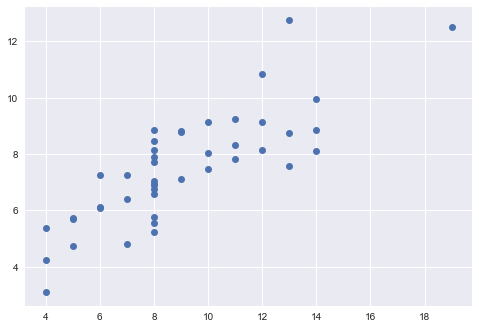

In [179]:
plt.plot(anscombe.x, anscombe.y, 'o') # plot points
plt.show()

In [174]:
dataset_2 = anscombe[anscombe.dataset == 'II']
dataset_3 = anscombe[anscombe.dataset == 'III']
dataset_4 = anscombe[anscombe.dataset == 'IV']

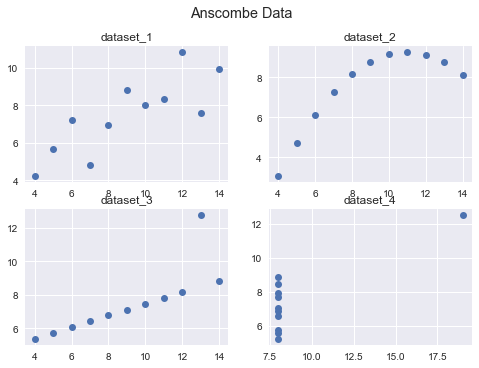

In [181]:
fig = plt.figure()
# 2x2 grid
axes1 = fig.add_subplot(2,2,1) # top-left corner
axes2 = fig.add_subplot(2,2,2) # top-right corner
axes3 = fig.add_subplot(2,2,3) # bottom-left corner
axes4 = fig.add_subplot(2,2,4) # bottom-right corner
axes1.plot(dataset_1.x, dataset_1.y, 'o')
axes2.plot(dataset_2.x, dataset_2.y, 'o')
axes3.plot(dataset_3.x, dataset_3.y, 'o')
axes4.plot(dataset_4.x, dataset_4.y, 'o')
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')
fig.suptitle('Anscombe Data')
plt.show()

In [183]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


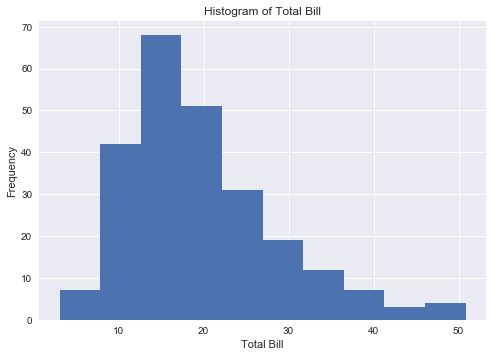

In [189]:
# create histogram
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins = 10)

axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')
plt.show()

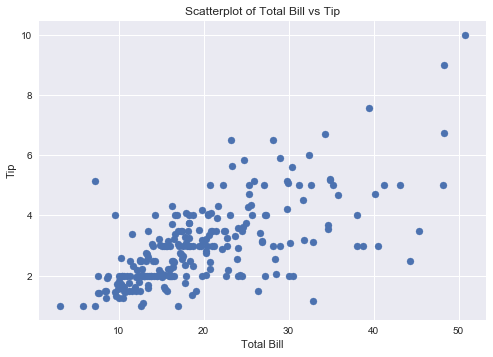

In [191]:
# bivariate plot (frequency plot)'
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
ftips = tips[tips['sex'] == 'Female']['tip']
mtips = tips[tips['sex'] == 'Male']['tip']plt.show()

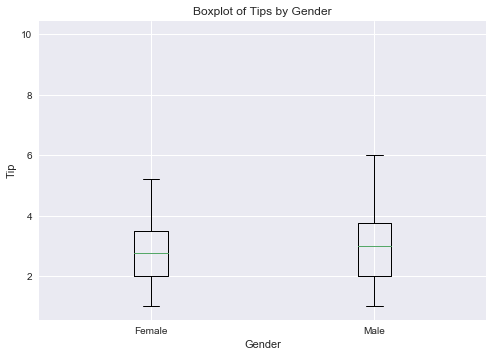

In [210]:
ftips = tips[tips['sex'] == 'Female']['tip']
mtips = tips[tips['sex'] == 'Male']['tip']
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot(
    [ftips, mtips], labels=['Female', 'Male'])
axes1.set_title('Boxplot of Tips by Gender')
axes1.set_xlabel('Gender')
axes1.set_ylabel('Tip')
plt.show()

In [226]:
def recode_sex(sex):
    if sex=='Female':
        return 'C0'
    else:
        return 'C2'

tips['sex_color'] = tips['sex'].apply(recode_sex)
        

In [212]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


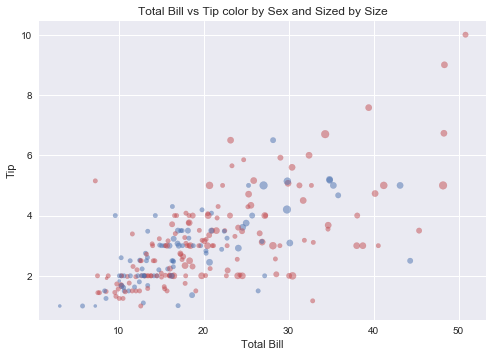

In [227]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x=tips['total_bill'], y=tips['tip'], s=tips['size']*10, c=tips['sex_color'], alpha=0.5)
axes1.set_title('Total Bill vs Tip color by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
plt.show()

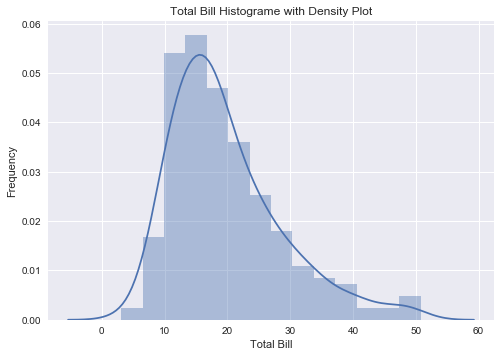

In [233]:
# seaborn
hist = sns.distplot(tips['total_bill'])
hist.set_title('Total Bill Histograme with Density Plot')
hist.set_xlabel('Total Bill')
hist.set_ylabel('Frequency')
plt.show() 

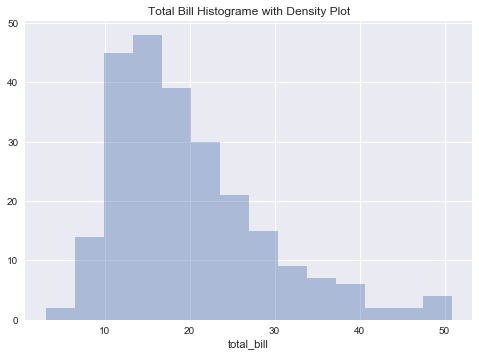

In [231]:
# remove kde plot; sometimes best to leave it out for performance
hist = sns.distplot(tips['total_bill'], kde=False)
hist.set_title('Total Bill Histograme with Density Plot')
hist.set_xlabel('Total Bill')
hist.set_ylabel('Frequency')
plt.show() 

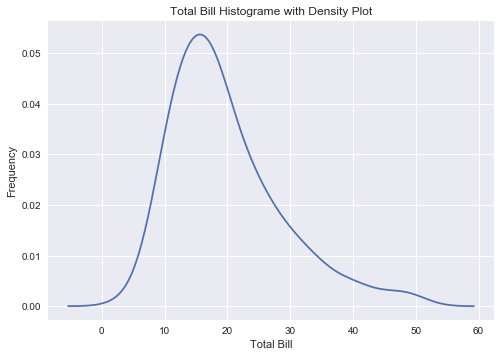

In [234]:
# only show kde plot
hist = sns.distplot(tips['total_bill'], hist=False)
hist.set_title('Total Bill Histograme with Density Plot')
hist.set_xlabel('Total Bill')
hist.set_ylabel('Frequency')
plt.show() 

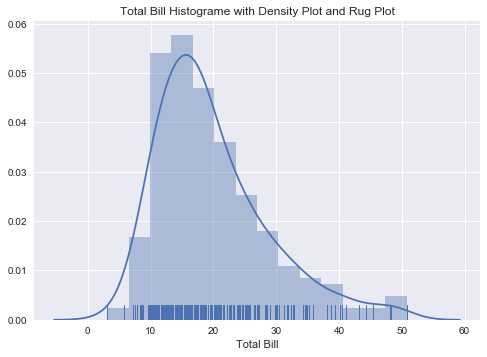

In [235]:
# rug plot
hist = sns.distplot(tips['total_bill'], rug=True)
hist.set_title('Total Bill Histograme with Density Plot and Rug Plot')
hist.set_xlabel('Total Bill')
plt.show() 

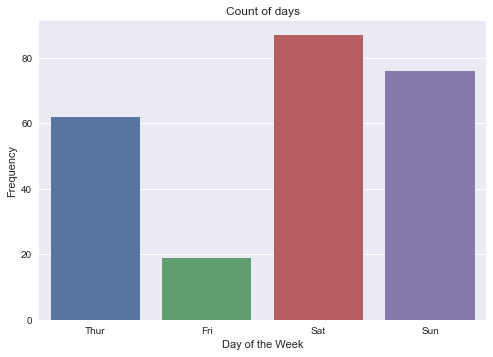

In [239]:
# bar plot
count = sns.countplot('day', data=tips)
count.set_title('Count of days')
count.set_xlabel('Day of the Week')
count.set_ylabel('Frequency')
plt.show()

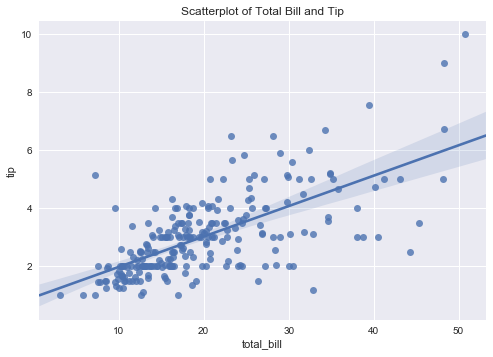

In [240]:
scatter = sns.regplot(x='total_bill', y='tip', data=tips)
scatter.set_title('Scatterplot of Total Bill and Tip')

plt.show()

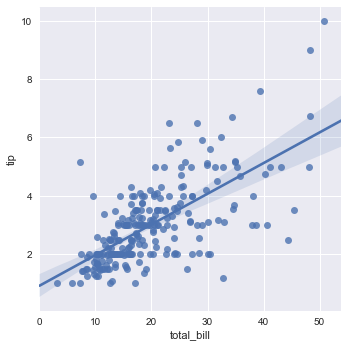

In [241]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

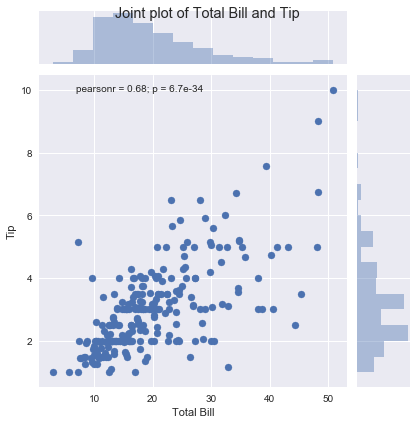

In [244]:
scatter = sns.jointplot(x='total_bill', y='tip', data=tips)
scatter.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
scatter.fig.suptitle('Joint plot of Total Bill and Tip')
plt.show()

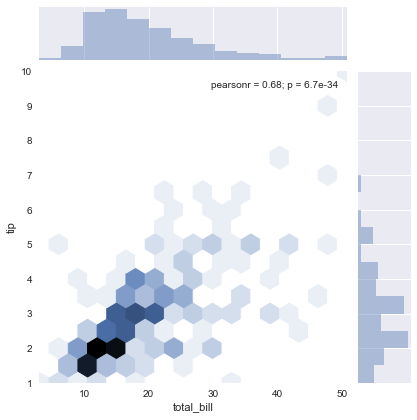

In [245]:
hbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
scatter.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
scatter.fig.suptitle('Joint plot of Total Bill and Tip')
plt.show()

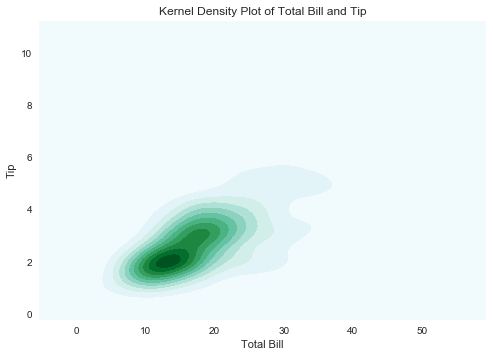

In [247]:
kde = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
kde.set_title('Kernel Density Plot of Total Bill and Tip')
kde.set_xlabel('Total Bill')
kde.set_ylabel('Tip')
plt.show()

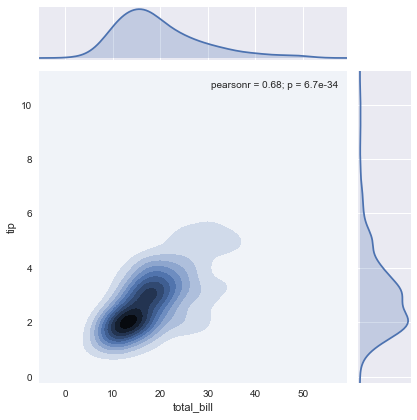

In [252]:

kde = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.show()

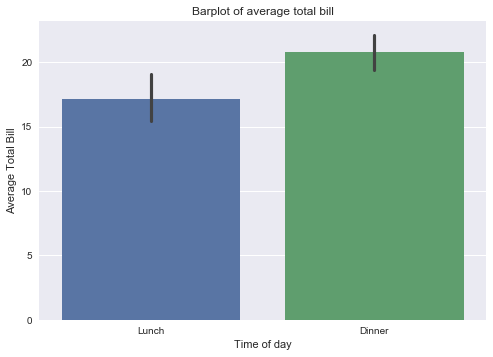

In [255]:
# barplot
bar = sns.barplot(x='time', y='total_bill', data=tips)
bar.set_title('Barplot of average total bill')
bar.set_xlabel('Time of day')
bar.set_ylabel('Average Total Bill')
plt.show()

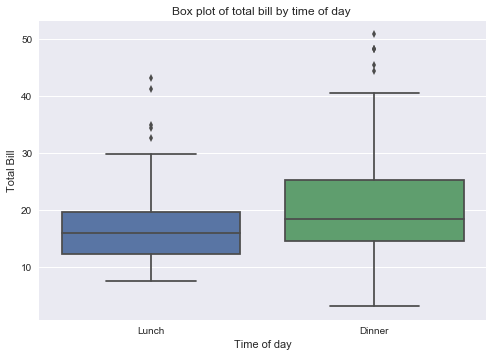

In [258]:
#boxplot
box = sns.boxplot(x='time', y='total_bill', data=tips)
box.set_title('Box plot of total bill by time of day ')
box.set_xlabel('Time of day')
box.set_ylabel('Total Bill')
plt.show()

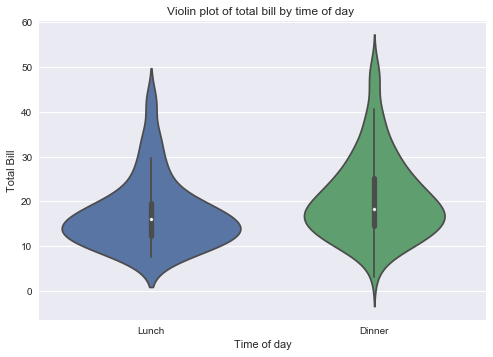

In [260]:
# violin plot
box = sns.violinplot(x='time', y='total_bill', data=tips)
box.set_title('Violin plot of total bill by time of day ')
box.set_xlabel('Time of day')
box.set_ylabel('Total Bill')
plt.show()

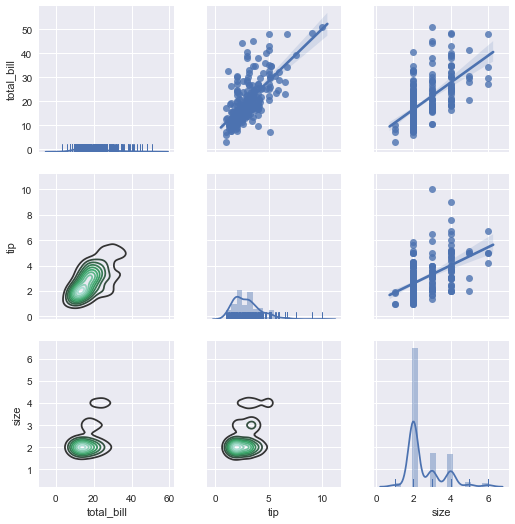

In [264]:
# pairwise relationship
tips=tips[['total_bill', 'tip', 'size']]
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

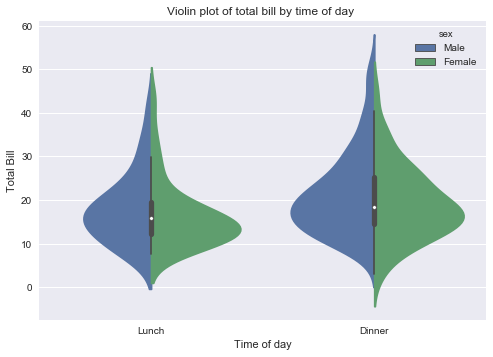

In [266]:
# colors
# violin plot
tips = sns.load_dataset('tips')
box = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex', split=True)
box.set_title('Violin plot of total bill by time of day ')
box.set_xlabel('Time of day')
box.set_ylabel('Total Bill')
plt.show()


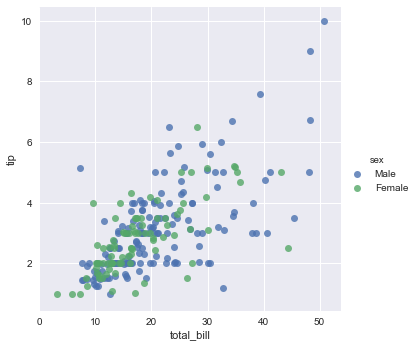

In [268]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)
plt.show()

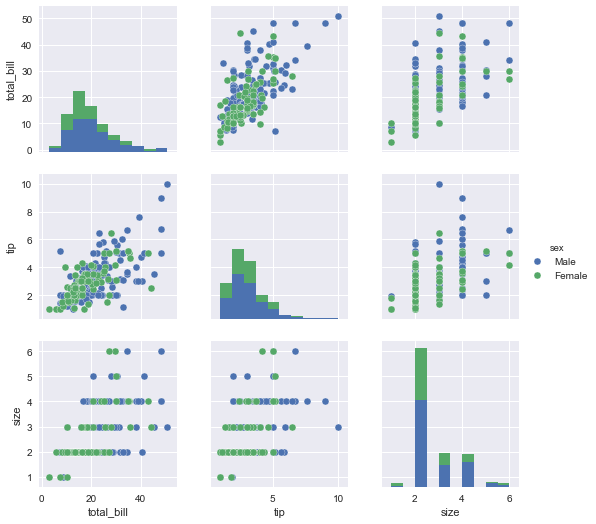

In [271]:
pair_plot = sns.pairplot(tips, hue='sex')
plt.show()

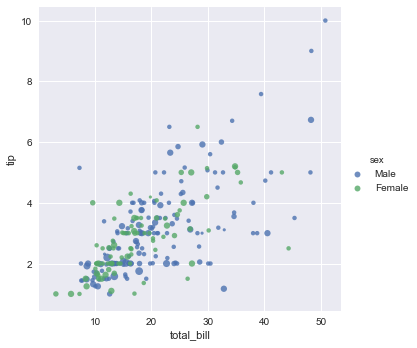

In [272]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s':tips['size']*10})
plt.show()

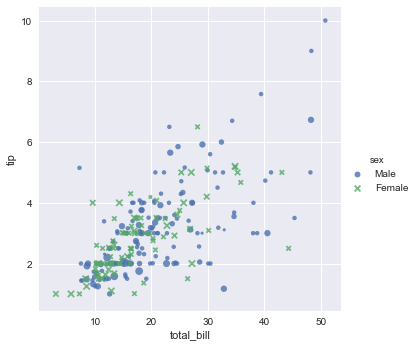

In [273]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s':tips['size']*10}, markers=['o', 'x'])
plt.show()

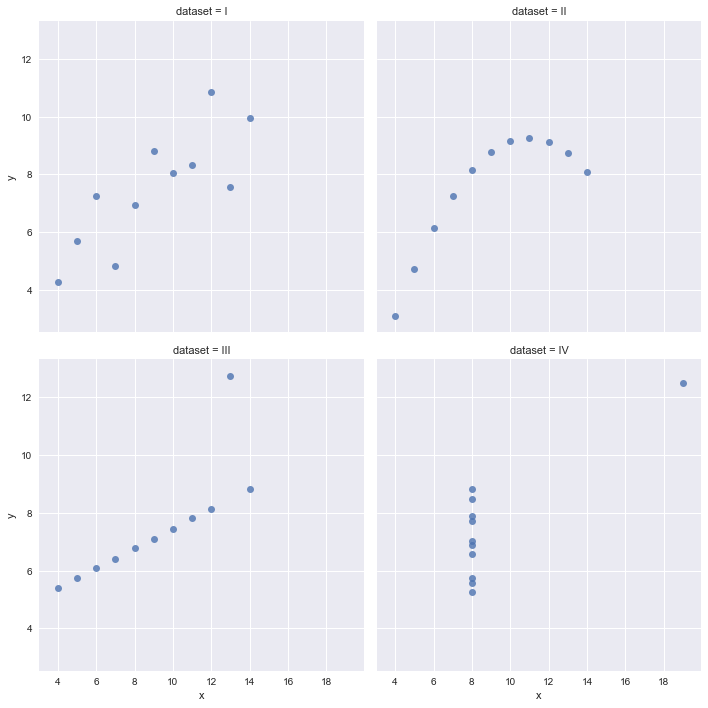

In [274]:
# facets
anscombe = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)
plt.show()

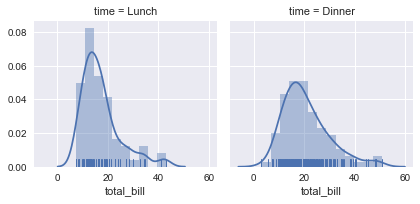

In [275]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)
plt.show()

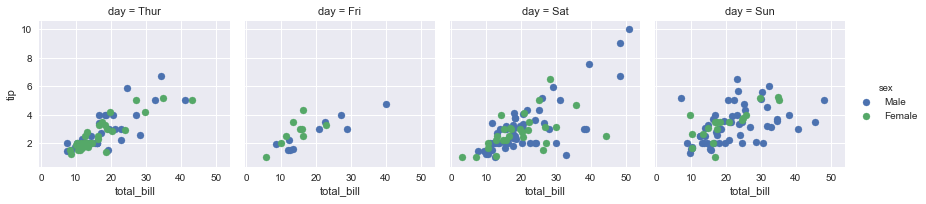

In [278]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()
plt.show()

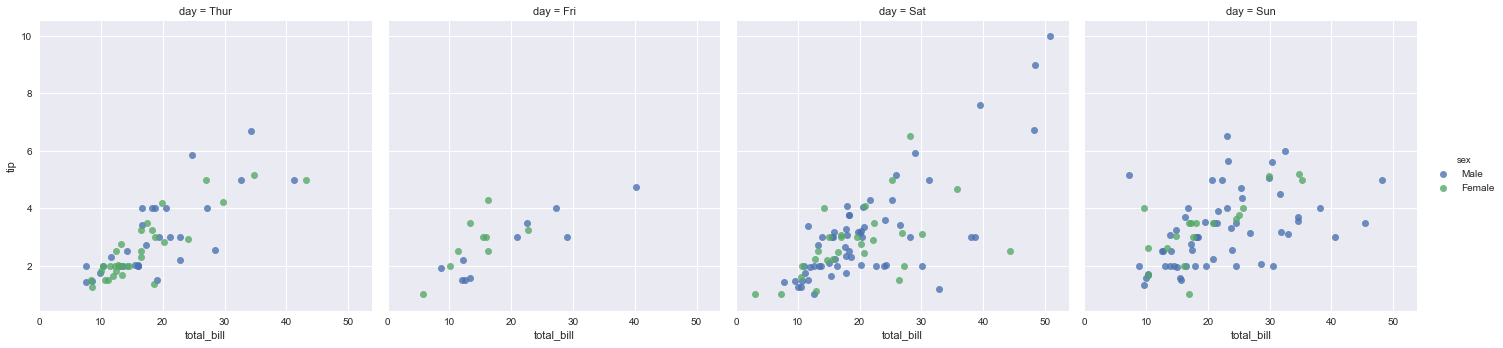

In [279]:
facet = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', col='day')

plt.show()


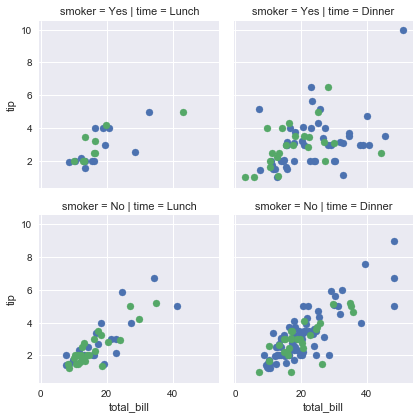

In [280]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip' )
plt.show()

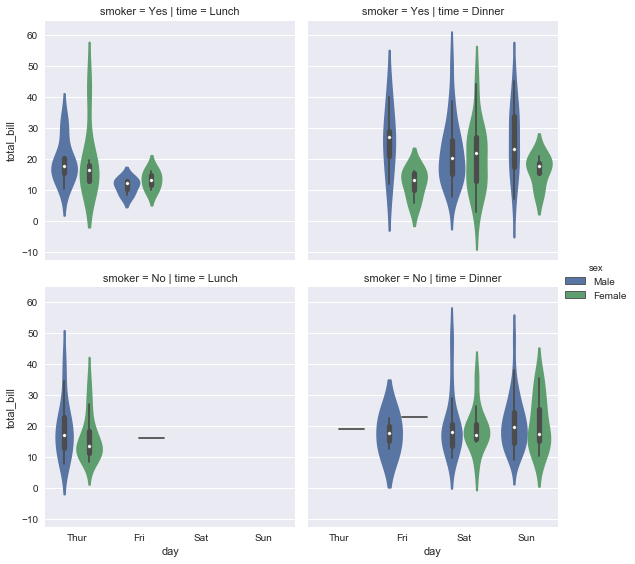

In [282]:
# factorplot for discrete variablds
factor_plot =sns.factorplot(x='day', y='total_bill', hue='sex', row='smoker', col='time', kind='violin', data=tips  )
plt.show()

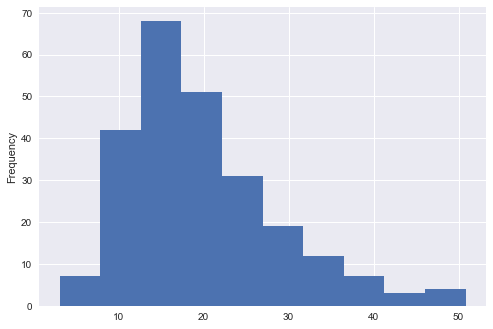

In [286]:
# plotting in pandas
tips['total_bill'].plot.hist()
plt.show()

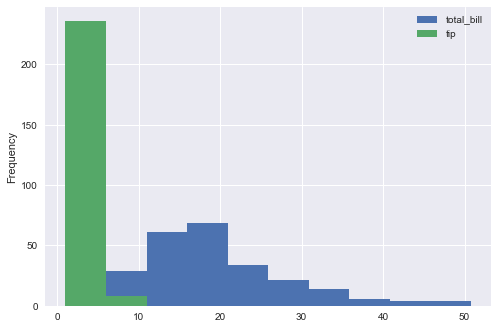

In [287]:
# plotting in pandas
tips[['total_bill', 'tip']].plot.hist()
plt.show()

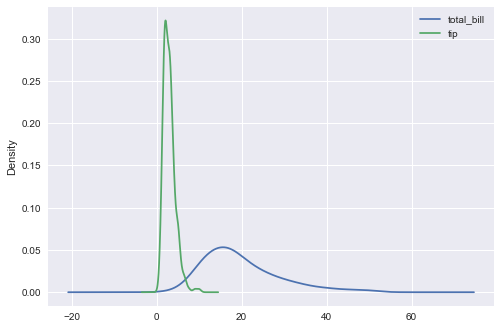

In [288]:
tips[['total_bill', 'tip']].plot.kde()
plt.show()

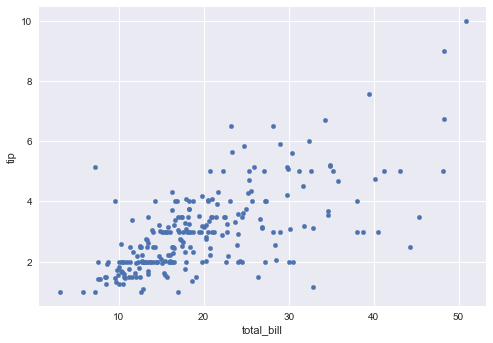

In [290]:
tips.plot.scatter(x='total_bill', y='tip')
plt.show()

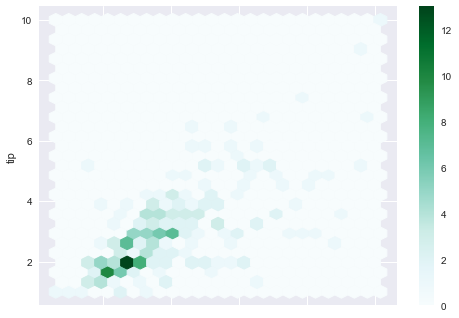

In [295]:
tips.plot.hexbin(x='total_bill', y='tip', gridsize=25)
plt.show()

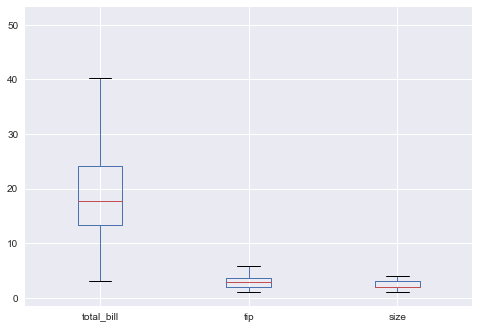

In [296]:
# pandas smart enough to know which variables to use
tips.plot.box()
plt.show()

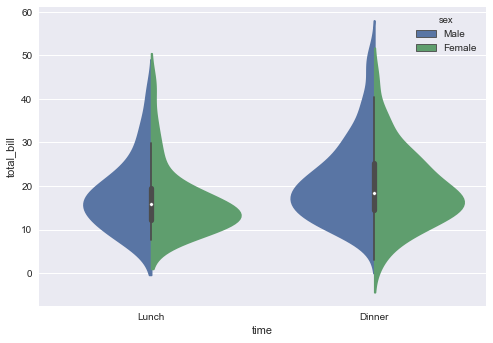

In [298]:
# seaborn themes
# base violin plot
violin = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex', split=True )
plt.show()

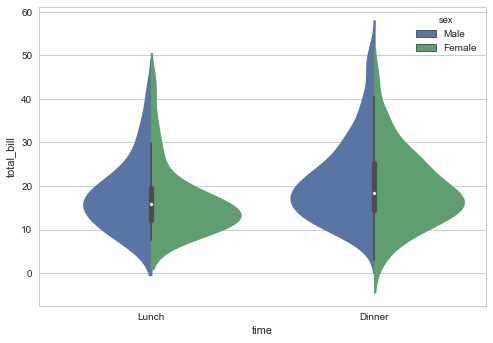

In [299]:
sns.set_style('whitegrid')
violin = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex', split=True )
plt.show()